# Mining Twitter

Twitter implements OAuth 1.0A as its standard authentication mechanism, and in order to use it to make requests to Twitter's API, you'll need to go to https://developer.twitter.com/en/apps and create a sample application. There are four primary identifiers you'll need to note for an OAuth 1.0A workflow: consumer key, consumer secret, access token, and access token secret. Note that you will need an ordinary Twitter account in order to login, create an app, and get these credentials.

<img src="resources/ch01-twitter/images/Twitter-AppCredentials.png" width="600px">

If you are taking advantage of the virtual machine experience for this chapter that is powered by Vagrant, you should just be able to execute the code in this notebook without any worries whatsoever about installing dependencies. If you are running the code from your own development envioronment, however, be advised that these examples in this chapter take advantage of a Python package called [twitter](https://github.com/sixohsix/twitter) to make API calls. You can install this package in a terminal with [pip](https://pypi.python.org/pypi/pip) with the command `pip install twitter`, preferably from within a [Python virtual environment](https://pypi.python.org/pypi/virtualenv). 

Once installed, you should be able to open up a Python interpreter (or better yet, your [IPython](http://ipython.org/) interpreter) and get rolling.

## Authorizing an application to access Twitter account data

In [1]:
!pip install twitter

     |████████████████████████████████| 61kB 1.1MB/s 


In [2]:
import twitter

# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = 'PT3TjQFnQjwPq6UwWh0l9mVLA'
CONSUMER_SECRET = 'uHwkJ6qK5WKWwRYsKy5zjkyYG0U68MtBButh0WKhtenfAocMJJ'
OAUTH_TOKEN = '1656867841-JpwZ5MWT4jNHZsF8vxFjSkaEmcKfx1gHEk8lkVN'
OAUTH_TOKEN_SECRET = '95LXQGHGhXrWE8OsFB1sAhy2Efcx0TRInDxova9kzUsGF'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

## Retrieving trends

In [ ]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977
#US_WOE_ID = 23424984

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(world_trends)
print()
print(us_trends)

[{'trends': [{'name': 'Zendaya', 'url': 'http://twitter.com/search?q=Zendaya', 'promoted_content': None, 'query': 'Zendaya', 'tweet_volume': 591553}, {'name': '#pazartesi', 'url': 'http://twitter.com/search?q=%23pazartesi', 'promoted_content': None, 'query': '%23pazartesi', 'tweet_volume': None}, {'name': '#prfmPOPFes', 'url': 'http://twitter.com/search?q=%23prfmPOPFes', 'promoted_content': None, 'query': '%23prfmPOPFes', 'tweet_volume': 52807}, {'name': '#คนนั้นต้องเป็นเธอ2M', 'url': 'http://twitter.com/search?q=%23%E0%B8%84%E0%B8%99%E0%B8%99%E0%B8%B1%E0%B9%89%E0%B8%99%E0%B8%95%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B9%80%E0%B8%9B%E0%B9%87%E0%B8%99%E0%B9%80%E0%B8%98%E0%B8%AD2M', 'promoted_content': None, 'query': '%23%E0%B8%84%E0%B8%99%E0%B8%99%E0%B8%B1%E0%B9%89%E0%B8%99%E0%B8%95%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B9%80%E0%B8%9B%E0%B9%87%E0%B8%99%E0%B9%80%E0%B8%98%E0%B8%AD2M', 'tweet_volume': 125543}, {'name': 'Lakers', 'url': 'http://twitter.com/search?q=Lakers', 'promoted_content': None, 'query':

In [ ]:
for trend in world_trends[0]['trends']:
    print(trend['name'])
    #print(trend['url'])

Zendaya
#pazartesi
#prfmPOPFes
#คนนั้นต้องเป็นเธอ2M
Lakers
#実際に言われた衝撃的なクレーム
#厨二病のための漢字クイズ2
バビット
Seahawks
セントライト記念
TwitteraGt Açılldı
Russell Wilson
台風12号
空気感染
敬老の日
Bad Bunny
Plumlee
nmmn
Shotaro
チェン
Edelman
ドルフィン
#mondaythoughts
#WeWantPopulationControlLaw
#InternationalDayOfPeace
#FelizLunes
#WandaVision
#生理的に無理なもの一覧表
#けもの道
#青汁王子
#SchittsCreek
#TrumpKillsPuertoRico
#LovecraftCountry
#BijakBerplastik
#KANTANAxSTARHUNTERProject2021
#okullaraçılıyor
#fenerinmacivar
#BJPKilledDemocracy
#21settembre
#내_사칭이_나타났을때_구별하는_법
#SCOTPOG
#WelcomeToNUNour
#MeaCulpaTVN
#내_어몽어스_살인자_플레이
#كلمه_لفانز_الفلبن
#HBDAtlee
#NeverAgain
#AdiosColosal
#DiaMundialDelAlzheimer
#RCBVsSRH


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import json
with open('/content/drive/My Drive/world.json', 'w') as json_file:
    json.dump(world_trends, json_file)


In [ ]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

#PayItForwardLIVE
#CNNTownHall
#CoronavirusOubreak
#KUWTK
#RentFreeze2020
Texas Roadhouse
Jon Jones
Vince Young
Curly Neal
Tory Lanez
WE'RE NUMBER ONE
Globetrotters
Italy and China
Da Brat
Peter Navarro
USA USA USA
Happy Birthday Chica
How's Michael
Beach Head
Lud Foe
Jimmy Wynn
#TrumpPressConf
#BRBettingSim
#AtTheIntrovertSupermarket
#IGotFiveOnIt
#MasteryChat
#2KRaffle
#MEMSPAchat
#heykesha
#5SOS
#MMPRTHEMOVIE
#RTXON
#JSFamilyVacation
#DistanceLearningChat
#LwCTrivia
#DaveMatthewsBand
#ISOL808
#PresserCOVID19
#EduLitChat
#kidkrowlisteningparty
#pencilsdown
#EduColor
#clapforourcarers
#BTStour2020
#VITwitterAwards
#mohawkedchat
#WhileIAmOnTheCrapper
#MLBOpeningDayAtHome
#AMessageofHope
#EkpesBookClub


In [ ]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'#5SOS', '#TrumpPressConf', '#RentFreeze2020', '#CNNTownHall', 'Jon Jones', '#KUWTK', '#PayItForwardLIVE', 'Tory Lanez'}


## Anatomy of a Tweet

In [ ]:
import json

# Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#PresserCOVID19' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "created_at": "Fri Mar 27 01:07:35 +0000 2020",
 "id": 1243343880088621057,
 "id_str": "1243343880088621057",
 "text": "RT @ZeusMGA: @realDonaldTrump #TrumpPressConf \"USA USA USA\" #PresserCOVID19\n\ud83e\udd14What good is it if the Oil and Gas Industry has no customers l\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "TrumpPressConf",
    "indices": [
     30,
     45
    ]
   },
   {
    "text": "PresserCOVID19",
    "indices": [
     60,
     75
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "ZeusMGA",
    "name": "Mad Greek",
    "id": 256715462,
    "id_str": "256715462",
    "indices": [
     3,
     11
    ]
   },
   {
    "screen_name": "realDonaldTrump",
    "name": "Donald J. Trump",
    "id": 25073877,
    "id_str": "25073877",
    "indices": [
     13,
     29
    ]
   }
  ],
  "urls": []
 },
 "me

In [ ]:
import json
with open('PresserCOVID19.json', 'w') as json_file:
    json.dump(statuses, json_file)

In [ ]:
for i in range(500):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @ZeusMGA: @realDonaldTrump #TrumpPressConf "USA USA USA" #PresserCOVID19
🤔What good is it if the Oil and Gas Industry has no customers l…
Favorites:  0
Retweets:  35

RT @OpusInProgress: Sorry, Dr. Birx. I call bullshit. They are NOT doing testing in rural areas. Check, for instance, Peoria, IL. This is m…
Favorites:  0
Retweets:  853

RT @OpusInProgress: Sorry, Dr. Birx. I call bullshit. They are NOT doing testing in rural areas. Check, for instance, Peoria, IL. This is m…
Favorites:  0
Retweets:  853

RT @OpusInProgress: Sorry, Dr. Birx. I call bullshit. They are NOT doing testing in rural areas. Check, for instance, Peoria, IL. This is m…
Favorites:  0
Retweets:  853

RT @OpusInProgress: Sorry, Dr. Birx. I call bullshit. They are NOT doing testing in rural areas. Check, for instance, Peoria, IL. This is m…
Favorites:  0
Retweets:  853

RT @OpusInProgress: Sorry, Dr. Birx. I call bullshit. They are NOT doing testing in rural areas. Check, for instance, Peoria, IL. This is m…
Favo

**văn bản in đậm**## Extracting text, screen names, and hashtags from tweets

In [ ]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:10], indent=1))
#print(json.dumps(screen_names[0:5], indent=1) )
#print(json.dumps(hashtags[0:5], indent=1))
#print(json.dumps(words[0:100], indent=1))

[
 "RT @ZeusMGA: @realDonaldTrump #TrumpPressConf \"USA USA USA\" #PresserCOVID19\n\ud83e\udd14What good is it if the Oil and Gas Industry has no customers l\u2026",
 "RT @OpusInProgress: Sorry, Dr. Birx. I call bullshit. They are NOT doing testing in rural areas. Check, for instance, Peoria, IL. This is m\u2026",
 "RT @OpusInProgress: Sorry, Dr. Birx. I call bullshit. They are NOT doing testing in rural areas. Check, for instance, Peoria, IL. This is m\u2026",
 "RT @OpusInProgress: Sorry, Dr. Birx. I call bullshit. They are NOT doing testing in rural areas. Check, for instance, Peoria, IL. This is m\u2026",
 "RT @OpusInProgress: Sorry, Dr. Birx. I call bullshit. They are NOT doing testing in rural areas. Check, for instance, Peoria, IL. This is m\u2026",
 "RT @OpusInProgress: Sorry, Dr. Birx. I call bullshit. They are NOT doing testing in rural areas. Check, for instance, Peoria, IL. This is m\u2026",
 "RT @revmagdalen: #PresserCOVID19 Gov Cuomo told us this morning that NY state has 

## Creating a basic frequency distribution from the words in tweets

In [ ]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT', 562), ('Dr.', 436), ('in', 433), ('I', 400), ('is', 394), ('for', 369), ('are', 360), ('@OpusInProgress:', 349), ('Sorry,', 349), ('Birx.', 349)]

[('OpusInProgress', 351), ('dharmadude', 38), ('MadamZolar', 34), ('realDonaldTrump', 27), ('ZeusMGA', 24), ('IndivisibleFlag', 17), ('Rtreatwilliams', 17), ('loralie_jenkins', 8), ('kaoconnor', 8), ('AnitaWade104', 8)]

[('PresserCOVID19', 186), ('TrumpPressConf', 37), ('TrumpMeltdown', 17), ('openingday2020', 17), ('GOPGhouls', 17), ('GOPSlushFund', 17), ('Trump', 12), ('COVID2019', 10), ('TrumpVirus2020', 9), ('CrimesAgainstHumanity', 9)]



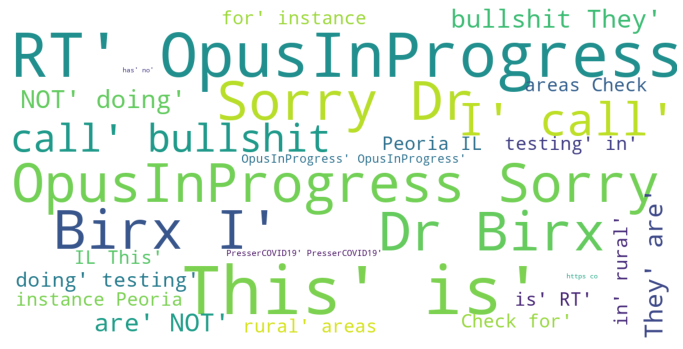

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud([words, screen_names, hashtags])
#show_wordcloud(words)


## Using prettytable to display tuples in a nice tabular format

In [ ]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-------------+-------+
| Word        | Count |
+-------------+-------+
| RT          |   400 |
| for         |   247 |
| a           |   231 |
| to          |   213 |
| the         |   205 |
| #MothersDay |   163 |
| in          |   129 |
| and         |   128 |
| this        |   125 |
| your        |   123 |
+-------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| UKGiftHour      |    39 |
| yorkgin         |    30 |
| UKMumstv        |    18 |
| Etsy            |    15 |
| FrenchieMummy   |    14 |
| elbricrafts     |    12 |
| Ali_F_Alizada   |    12 |
| BeetleNoisy     |    12 |
| gettothefront   |    11 |
| QuiltsforDreams |    10 |
+-----------------+-------+
+------------------------+-------+
| Hashtag                | Count |
+------------------------+-------+
| MothersDay             |   194 |
| mothersday             |    65 |
| UKGiftHour             |    62 |
| UKGiftAM               |    40 |
| win                    | 

## Calculating lexical diversity for tweets

In [ ]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.24213943950786057
0.4194690265486726
0.2777307366638442
20.006837606837607


## Finding the most popular retweets

In [ ]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-----------------+---------------------+----------------------------------------------------+
| Count | Screen Name     | Tweet ID            | Text                                               |
+-------+-----------------+---------------------+----------------------------------------------------+
| 880   | TheRealPieComp  | 1230794646953046018 | RT @TheRealPieComp: To celebrate all the fantastic |
|       |                 |                     | mums out there, we are giving away the perfect     |
|       |                 |                     | Mother's Day gift - a £50 voucher to spen…         |
| 705   | giftsinternatio | 1234056831686893570 | RT @giftsinternatio: So here we go with our        |
|       |                 |                     | #MothersDay #Giveaway https://t.co/c1ZW63VhiJ      |
|       |                 |                     | Simply FOLLOW and RETWEET to be in with a chance.… |
| 679   | UKMumstv        | 1234403362080280576 | RT @UKMumstv: With #Mot

## Looking up users who have retweeted a status

In [ ]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here

_retweets = twitter_api.statuses.retweets(id=862359093398261760)
print([r['user']['screen_name'] for r in _retweets])

['vijoumolce1988', 'driftourare1988', 'NoNicheNC', 'livingmybestie', 'Rockawaytheday']


## Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

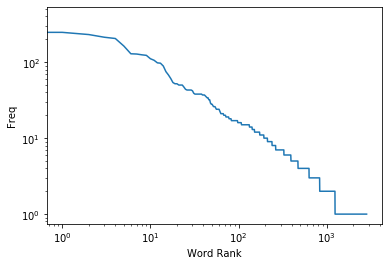

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Generating histograms of words, screen names, and hashtags

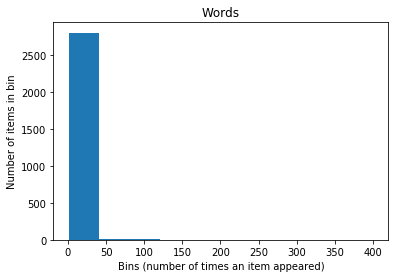

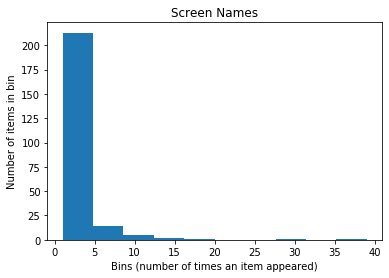

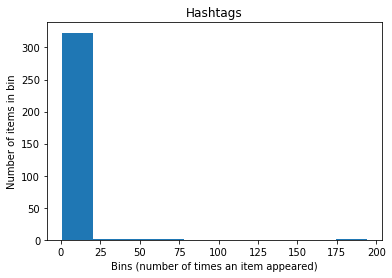

<Figure size 432x288 with 0 Axes>

In [ ]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

## Generating a histogram of retweet counts

Text(0, 0.5, 'Number of tweets in bin')

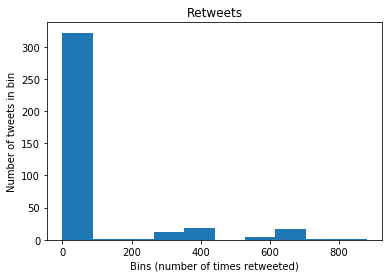

In [ ]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

## Sentiment Analysis

In [ ]:
# pip install nltk
import nltk
nltk.download('vader_lexicon')

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
twitter_stream = twitter.TwitterStream(auth=auth)
iterator = twitter_stream.statuses.sample()

In [ ]:
tweets = []
for tweet in iterator:
    try:
        if tweet['lang'] == 'en':
            tweets.append(tweet)
    except:
        pass
    if len(tweets) == 100:
        break

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
analyzer.polarity_scores('Hello')
#analyzer.polarity_scores('Good morning!')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
analyzer.polarity_scores('I really enjoy this video series.')

{'compound': 0.5413, 'neg': 0.0, 'neu': 0.534, 'pos': 0.466}

In [ ]:
analyzer.polarity_scores('I REALLY enjoy this video series.')

{'compound': 0.64, 'neg': 0.0, 'neu': 0.486, 'pos': 0.514}

In [ ]:
analyzer.polarity_scores('I REALLY enjoy this video series!!!')

{'compound': 0.7271, 'neg': 0.0, 'neu': 0.439, 'pos': 0.561}

In [ ]:
analyzer.polarity_scores('I REALLY did not enjoy this video series!!!')

{'compound': -0.6627, 'neg': 0.425, 'neu': 0.575, 'pos': 0.0}

In [ ]:
scores = np.zeros(len(tweets))

for i, t in enumerate(tweets):
    # Extract the text portion of the tweet
    text = t['text']
    
    # Measure the polarity of the tweet
    polarity = analyzer.polarity_scores(text)
    
    # Store the normalized, weighted composite score
    scores[i] = polarity['compound']

In [ ]:
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

In [ ]:
print('{0:6.3f} : "{1}"'.format(scores[most_positive], tweets[most_positive]['text']))

 0.893 : "RT @AlyTheMinx: Flawless. Perfect. Godly. You knew perfection existed you just never knew it was this hot. I give you full permission to ge…"


In [ ]:
print('{0:6.3f} : "{1}"'.format(scores[most_negative], tweets[most_negative]['text']))

-0.892 : "RT @Jamierodr14: VILE! 

A Brooklyn man was caught hoarding one million masks, gloves, gowns &amp; other suppl He faces charges for lying &amp; the…"
